In [61]:
import pandas as pd
from surprise import Dataset, Reader, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate, GridSearchCV
import matplotlib.pyplot as plt

In [62]:
file_path = 'data_hw_7/ml-100k/u.data'

In [63]:
reader = Reader('ml-100k')

In [64]:
data = Dataset.load_from_file(file_path, reader=reader)

In [65]:
#Налаштування гіперпараметрів
param_grid_svd = {
    'n_factors': [100],
    'n_epochs': [20],
    'lr_all': [0.005],
    'reg_all': [0.4]
}

param_grid_svdpp = {
    'n_factors': [50],
    'n_epochs': [20],
    'lr_all': [0.005],
    'reg_all': [0.4]
}

param_grid_nmf = {
    'n_factors': [10],
    'n_epochs': [20],
    'reg_pu': [0.06],
    'reg_qi': [0.06]
}

In [66]:
# GridSearchCV для SVD
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=2)
gs_svd.fit(data)
best_svd_params = gs_svd.best_params['rmse']
print(f"Best SVD parameters: {best_svd_params}")

Best SVD parameters: {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


In [67]:
# GridSearchCV для SVD++
gs_svdpp = GridSearchCV(SVDpp, param_grid_svdpp, measures=['rmse'], cv=2)
gs_svdpp.fit(data)
best_svdpp_params = gs_svdpp.best_params['rmse']
print(f"Best SVD++ parameters: {best_svdpp_params}")

Best SVD++ parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


In [68]:
# GridSearchCV для NMF
gs_nmf = GridSearchCV(NMF, param_grid_nmf, measures=['rmse'], cv=2)
gs_nmf.fit(data)
best_nmf_params = gs_nmf.best_params['rmse']
print(f"Best NMF parameters: {best_nmf_params}")

Best NMF parameters: {'n_factors': 10, 'n_epochs': 20, 'reg_pu': 0.06, 'reg_qi': 0.06}


In [69]:
# Оцінка найкращих моделей за допомогою крос-валідації
algo_svd = SVD(**best_svd_params)
algo_svdpp = SVDpp(**best_svdpp_params)
algo_nmf = NMF(**best_nmf_params)

In [70]:
print("Evaluating SVD:")
result_svd = cross_validate(algo_svd, data, measures=['rmse', 'mae'], cv=5, verbose=True)
SVD_result = pd.DataFrame.from_dict(result_svd).mean(axis=0)

Evaluating SVD:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9641  0.9617  0.9535  0.9470  0.9585  0.9570  0.0061  
MAE (testset)     0.7701  0.7714  0.7626  0.7594  0.7685  0.7664  0.0046  
Fit time          0.59    0.58    0.50    0.50    0.50    0.53    0.04    
Test time         0.08    0.08    0.16    0.08    0.07    0.09    0.03    


In [71]:
print("Evaluating SVD++:")
result_svdpp = cross_validate(algo_svdpp, data, measures=['rmse', 'mae'], cv=5, verbose=True)
SVDPP_result = pd.DataFrame.from_dict(result_svdpp).mean(axis=0)

Evaluating SVD++:
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9661  0.9535  0.9590  0.9464  0.9568  0.9563  0.0065  
MAE (testset)     0.7744  0.7646  0.7667  0.7587  0.7657  0.7660  0.0050  
Fit time          25.24   25.31   25.05   25.17   25.12   25.18   0.09    
Test time         3.04    2.56    2.77    2.64    2.51    2.70    0.19    


In [72]:
print("Evaluating NMF:")
result_nmf = cross_validate(algo_nmf, data, measures=['rmse', 'mae'], cv=5, verbose=True)
NMF_result = pd.DataFrame.from_dict(result_nmf).mean(axis=0)

Evaluating NMF:
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0648  1.0688  1.0557  1.0628  1.0491  1.0603  0.0070  
MAE (testset)     0.8752  0.8783  0.8655  0.8724  0.8581  0.8699  0.0073  
Fit time          0.38    0.41    0.35    0.36    0.39    0.38    0.02    
Test time         0.07    0.17    0.07    0.07    0.06    0.09    0.04    


In [76]:
Final_result = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])

Final_result['SVD'] = SVD_result
Final_result['SVDpp'] = SVDPP_result
Final_result['NMF'] = NMF_result

Final_result

,SVD,SVDpp,NMF
test_rmse,0.956957,0.956324,1.060252
test_mae,0.766425,0.766037,0.869909
fit_time,0.534546,25.179530,0.377113
test_time,0.093008,2.704485,0.087816


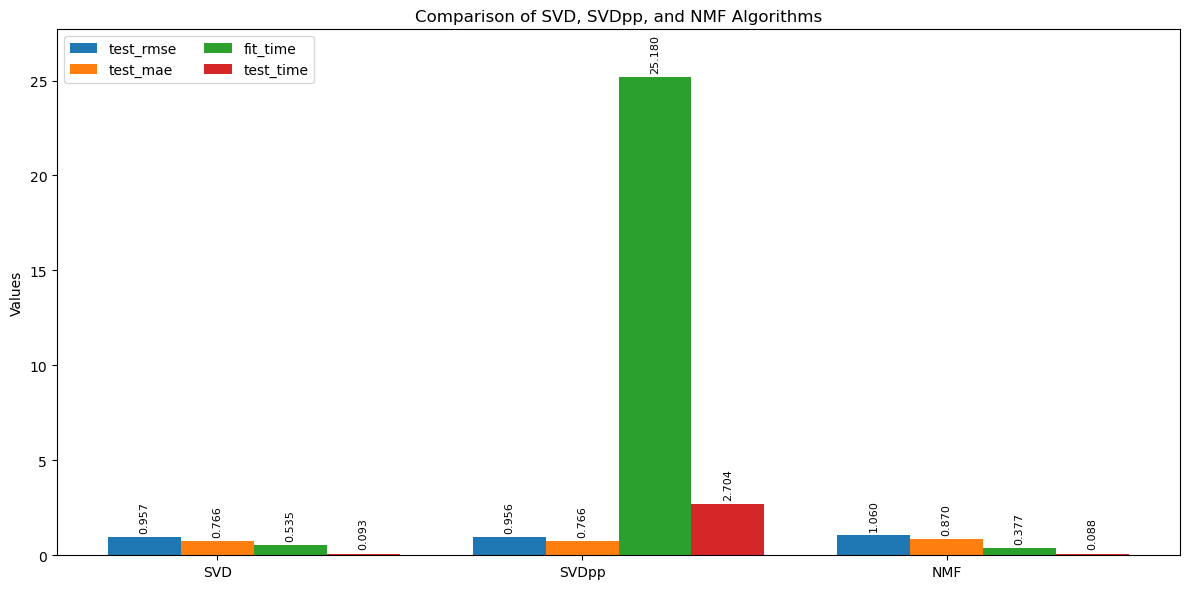

In [83]:
algorithms = Final_result.columns.tolist()
metrics = Final_result.index.tolist()

x = np.arange(len(algorithms))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

for metric in metrics:
    offset = width * multiplier
    values = Final_result.loc[metric].values
    rects = ax.bar(x + offset, values, width, label=metric)
    ax.bar_label(rects, fmt='%.3f', padding=3, rotation=90, fontsize=8)
    multiplier += 1

ax.set_ylabel('Values')
ax.set_title('Comparison of SVD, SVDpp, and NMF Algorithms')
ax.set_xticks(x + width, algorithms)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, Final_result.values.max() * 1.1)  

plt.tight_layout()
plt.show()


##Висновки

SVD (Сингулярний розклад матриці):

Має хорошу точність прогнозування з RMSE 0,957 та MAE 0,766. Демонструє збалансовану продуктивність між точністю та швидкістю. Час навчання (fit_time) складає 0,53 секунди, що є середнім показником. Час тестування (test_time) дуже швидкий - 0,093 секунди.


SVDpp (SVD++):

Показує найкращу точність прогнозування з найнижчими RMSE (0,956) та MAE (0,766). Однак має значно довший час навчання - 25,18 секунд, що набагато більше за інші моделі.
Час тестування також найдовший - 2,7 секунди. Найкраща модель за точністю, але найповільніша у навчанні та тестуванні.


NMF (Невід'ємна матрична факторизація):

Має найгіршу точність прогнозування з RMSE 1,060 та MAE 0,870. Проте демонструє найшвидший час навчання - лише 0,377 секунди. Час тестування також найшвидший - 0,088 секунди.
Найшвидша модель, але з найнижчою точністю.



##Загальні висновки:

SVDpp забезпечує найкращу точність, але потребує значно більше часу на навчання та тестування.
SVD пропонує хороший баланс між точністю та швидкістю.
NMF є найшвидшою, але найменш точною моделлю.
Вибір моделі залежить від пріоритетів: якщо потрібна найвища точність і час не критичний - SVDpp; якщо важлива швидкість - NMF; якщо потрібен баланс - SVD.